# IMDbでBoW

## IMdbデータセット
- 映画レビューのデータセット
- データ
    - 肯定的(pos) or 否定的(neg) ※実際には10段階の点数
    - レビューテキスト

## データセットの準備

In [1]:
from sklearn.datasets import load_files

reviews_train = load_files("./imdb_dataset/train/")

text_train, y_train = reviews_train.data, reviews_train.target

In [2]:
type(text_train)

list

In [3]:
len(text_train)

25000

In [4]:
# 実際のデータの中身を確認
text_train[1]

b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decision" should without a doubt be you\'re choice over this one, even the "Turbulenc

## データのクリーニング

In [5]:
# データをきれいにする
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [6]:
import numpy as np

# クラスのバランスを確認する
print(np.bincount(y_train))

[12500 12500]


## testデータの読み込み

In [7]:
reviews_test = load_files("./imdb_dataset/test/")

text_test, y_test = reviews_test.data, reviews_test.target

text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

In [8]:
type(text_test)

list

In [9]:
len(text_test)

25000

In [10]:
text_test[1]

b'I don\'t know how this movie has received so many positive comments. One can call it "artistic" and "beautifully filmed", but those things don\'t make up for the empty plot that was filled with sexual innuendos. I wish I had not wasted my time to watch this movie. Rather than being biographical, it was a poor excuse for promoting strange and lewd behavior. It was just another Hollywood attempt to convince us that that kind of life is normal and OK. From the very beginning I asked my self what was the point of this movie,and I continued watching, hoping that it would change and was quite disappointed that it continued in the same vein. I am so glad I did not spend the money to see this in a theater!'

# Bag of Wordsを適用する

In [1]:
# IMDbに適用
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(text_train)

X_train = vect.transform(text_train)

NameError: name 'text_train' is not defined

In [12]:
# 25000x74849 の SparseMatrix
X_train

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>

In [13]:
feature_names = vect.get_feature_names()

In [14]:
len(feature_names)

74849

In [15]:
feature_names[:20]

['00',
 '000',
 '0000000000001',
 '00001',
 '00015',
 '000s',
 '001',
 '003830',
 '006',
 '007',
 '0079',
 '0080',
 '0083',
 '0093638',
 '00am',
 '00pm',
 '00s',
 '01',
 '01pm',
 '02']

In [16]:
print(feature_names[30010:30030])

['hasidic', 'haskell', 'haskins', 'hasn', 'hasnt', 'hass', 'hassadeevichit', 'hassan', 'hasselhof', 'hasselhoff', 'hassell', 'hassett', 'hassie', 'hassle', 'hassled', 'hasslehoff', 'hassles', 'hassling', 'hasso', 'hasta']


In [17]:
print(feature_names[::3000])

['00', 'ameliorated', 'barking', 'breslin', 'chicanery', 'cost', 'detox', 'eeriest', 'favorit', 'gazongas', 'hasan', 'imtiaz', 'kantrowitz', 'listlessness', 'megalunged', 'nathaniel', 'padilla', 'possessed', 'receptionist', 'sabres', 'shunning', 'steakley', 'temptations', 'umney', 'walkman']


#  2クラス分類のモデルをつくる

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(),
                         X_train,
                         y_train,
                         cv=3)

/Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
scores.mean(), scores.std()

(0.876040046417026, 0.0012915430653395624)

##  GridSearch

In [20]:
from sklearn.model_selection import GridSearchCV

# param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid = {"C": [0.01, 0.1, 1]}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)

In [21]:
# 1分くらいはかかる
grid.fit(X_train, y_train)

/Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [22]:
print(grid.best_score_)
print(grid.best_params_)

0.88816
{'C': 0.1}


In [23]:
# テストデータでの評価
X_test = vect.transform(text_test)

print(grid.score(X_test, y_test))

0.87892


## 次元数を減らす
- 少なくとも5回以上登場する単語のみ限定

In [24]:
vect = CountVectorizer(min_df=5).fit(text_train)

X_train = vect.transform(text_train)

print(repr(X_train))

<25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [25]:
feature_names = vect.get_feature_names()

In [26]:
feature_names[:20]

['00',
 '000',
 '007',
 '00s',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '100',
 '1000',
 '100th',
 '101',
 '102',
 '103']

In [27]:
feature_names[::700]

['00',
 'affections',
 'appropriately',
 'barbra',
 'blurbs',
 'butchered',
 'cheese',
 'commitment',
 'courts',
 'deconstructed',
 'disgraceful',
 'dvds',
 'eschews',
 'fell',
 'freezer',
 'goriest',
 'hauser',
 'hungary',
 'insinuate',
 'juggle',
 'leering',
 'maelstrom',
 'messiah',
 'music',
 'occasional',
 'parking',
 'pleasantville',
 'pronunciation',
 'recipient',
 'reviews',
 'sas',
 'shea',
 'sneers',
 'steiger',
 'swastika',
 'thrusting',
 'tvs',
 'vampyre',
 'westerns']

In [28]:
# 再びグリッドサーチ
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)

grid.fit(X_train, y_train)

/Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [29]:
print(grid.best_score_)
print(grid.best_params_)

0.88812
{'C': 0.1}


In [30]:
# テストデータでの評価
X_test = vect.transform(text_test)

print(grid.score(X_test, y_test))

0.87784


### 観察
- 次元数を減らすやや精度向上
- 計算時間の削減などの効果もある

# ストップワード処理
- 頻出する単語を除去する

In [31]:
from sklearn.feature_extraction.text  import ENGLISH_STOP_WORDS

print(type(ENGLISH_STOP_WORDS))

<class 'frozenset'>


In [32]:
print(len(ENGLISH_STOP_WORDS))

318


In [33]:
print(list(ENGLISH_STOP_WORDS)[::10])

['hereby', 'to', 'such', 'ie', 'it', 'sometimes', 'couldnt', 'among', 'own', 'one', 'except', 'whom', 'below', 'your', 'as', 'was', 'rather', 'whereby', 'inc', 'some', 'becomes', 'they', 'meanwhile', 'anywhere', 'two', 'besides', 'every', 'done', 'mine', 'ever', 'co', 'if']


In [34]:
vect = CountVectorizer(min_df=5,stop_words="english")

vect.fit(text_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [35]:
X_train = vect.transform(text_train)

In [36]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)

grid.fit(X_train, y_train)

/Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [37]:
print(grid.best_score_)

0.88296


## 観察
- 300程度の特徴量を減らしてもあまり変わらない
- 今回のケースにおいてはそこまで影響がなかった

#  TF-IDF
重要でなさそうな特徴量を落とすのではなく、特徴量がどの程度情報を持っていそうかに応じ て、特徴量のスケールを変換する手法がある。これの最も一般的な手法が、tf‒idf(term frequency– inverse document frequency)である。直観的に説明すると、この手法は、特定の文書にだけ頻 繁に現れる単語に大きな重みを与え、コーパス中の多数の文書に現れる単語にはあまり重みを与 えない。特定の文書にだけ頻出し、他の文書にはあまり現れない単語は、その文書の内容をよく 示しているのではないか、という発想だ。

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
                     LogisticRegression())

In [39]:
# param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100]}

param_grid = {"logisticregression__C": [0.01, 0.1, 1]}

In [40]:
grid = GridSearchCV(pipe, param_grid, cv=5)

In [41]:
# 2分程度の時間がかかる
grid.fit(text_train, y_train)

/Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 1), norm=None, preprocessor=None, smooth...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'logisticregression__C': [0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
grid.best_score_

0.88708

## TFIDFの値を調べる
- TF-IDFが低い特徴量
    - 多くの文書に共通して出現するか、
    - あまり出現しないか、
    - 非常に長い文書にしか出現しないか

In [43]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]

In [44]:
X_train = vectorizer.transform(text_train)

In [45]:
max_value = X_train.max(axis=0).toarray().ravel()

sorted_byidf = max_value.argsort()

In [46]:
sorted_byidf

array([18279,  6912, 12631, ..., 20518, 24586, 24618])

In [47]:
feature_names = np.array(vectorizer.get_feature_names())

In [48]:
feature_names[sorted_byidf[:20]]

array(['poignant', 'disagree', 'instantly', 'importantly', 'lacked',
       'occurred', 'currently', 'altogether', 'nearby', 'undoubtedly',
       'directs', 'fond', 'stinker', 'avoided', 'emphasis', 'commented',
       'disappoint', 'realizing', 'downhill', 'inane'], dtype='<U20')

In [49]:
feature_names[sorted_byidf[-20:]]

array(['coop', 'homer', 'dillinger', 'hackenstein', 'gadget', 'taker',
       'macarthur', 'vargas', 'jesse', 'basket', 'dominick', 'the',
       'victor', 'bridget', 'victoria', 'khouri', 'zizek', 'rob', 'timon',
       'titanic'], dtype='<U20')

### 観察
#### TDIDFの高い特徴量
- 特定の映画を指している
    - これらの単語は特定の映画やシリーズのレビューにしか現れないが、それらのレビューには非常に頻繁に現れる
    - ex: "titanic", "homer", "dillinger" など
- これらの単語は、センチメント分析タスクにはあまり役に立たない可能性が高い
    - 肯定的なのか否定的なのかはタイトルだけではわからない

### 文書頻度の逆数(IDF: Inverse Document Frequency)
- 高い頻度で現れるため、重要でないと考えられる単語

In [50]:
# idfでsort
sorted_by_idf = np.argsort(vectorizer.idf_)

feature_names[sorted_by_idf[:100]]

array(['the', 'and', 'of', 'to', 'this', 'is', 'it', 'in', 'that', 'but',
       'for', 'with', 'was', 'as', 'on', 'movie', 'not', 'have', 'one',
       'be', 'film', 'are', 'you', 'all', 'at', 'an', 'by', 'so', 'from',
       'like', 'who', 'they', 'there', 'if', 'his', 'out', 'just',
       'about', 'he', 'or', 'has', 'what', 'some', 'good', 'can', 'more',
       'when', 'time', 'up', 'very', 'even', 'only', 'no', 'would', 'my',
       'see', 'really', 'story', 'which', 'well', 'had', 'me', 'than',
       'much', 'their', 'get', 'were', 'other', 'been', 'do', 'most',
       'don', 'her', 'also', 'into', 'first', 'made', 'how', 'great',
       'because', 'will', 'people', 'make', 'way', 'could', 'we', 'bad',
       'after', 'any', 'too', 'then', 'them', 'she', 'watch', 'think',
       'acting', 'movies', 'seen', 'its', 'him'], dtype='<U20')

### 観察
- ストップワードにかなり近い単語

# モデル係数の可視化

In [51]:
!pip install mglearn

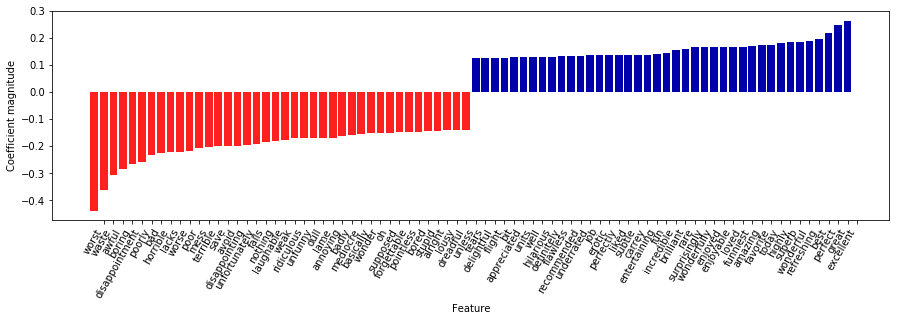

In [52]:
import mglearn
%matplotlib inline

mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_,
    feature_names, n_top_features=40)

## 観察
### 負の係数(左側)
- 否定的なレビューを示している単語に対応
    - "worst"、"waste"、"disappointment"

### 正の係数(右側)
- 肯定的なレビューを示している単語に対応
    - "excellent"、"wonderful"、"enjoyable"、"refreshing

### 中央付近
- "bit"、"job"、"today"あたりはそれほど明らかではないが、おそらく"goodjob"や"besttoday"などのフレーズの一部なのでは？
